In [2]:
import warnings
from importlib import reload
from functools import partial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

from ipynb.fs.defs import Bias
from ipynb.fs.defs.Datasets import generateData_twoPills_2D, generateData_twoPills_noNoise_2D, plot_dataset_2D

import libactive
import libadversarial
from libactive import MyActiveLearner, active_split, beam_search
from libadversarial import poison, random_synthesis

c:\users\zac\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


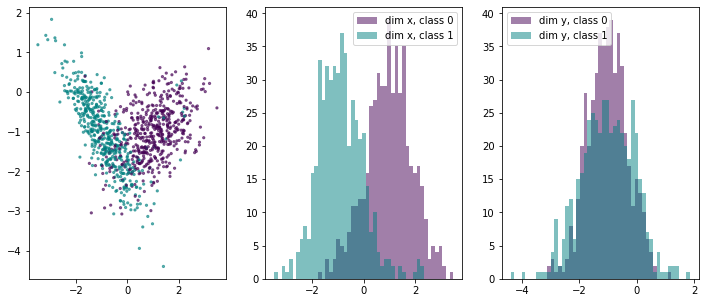

In [3]:
X, y = generateData_twoPills_2D(1000)
plot_dataset_2D(X, y)

In [4]:
X_labelled, X_unlabelled, y_labelled, y_oracle, X_test, y_test = active_split(X, y, labeled_size=0.2)
X_biased, y_biased = Bias.bias_rotate_2D(X_labelled, y_labelled, alpha=np.pi, biasedClass=0, prob=0)

In [42]:
np.block([
    [np.array([[1,2],[5,6]]), np.array([[3,7]]).T]
])

array([[1, 2, 3],
       [5, 6, 7]])

In [82]:
reload(libactive); from libactive import beam_search
beam_search(X_biased, X_unlabelled, y_biased, y_oracle, X_test, y_test)

[[ 73]
 [249]
 [ 53]
 [240]
 [152]]
[[0.814, 0.814, 0.838, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.828, 0.814, 0.814, 0.814, 0.824, 0.814, 0.814, 0.814, 0.814, 0.814, 0.842, 0.814, 0.814, 0.814, 0.814, 0.814, 0.828, 0.814, 0.842, 0.812, 0.814, 0.804, 0.804, 0.814, 0.814, 0.836, 0.824, 0.814, 0.824, 0.814, 0.814, 0.828, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.816, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.832, 0.828, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.824, 0.814, 0.842, 0.814, 0.828, 0.814, 0.814, 0.844, 0.824, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.828, 0.814, 0.814, 0.828, 0.814, 0.814, 0.814, 0.814, 0.842, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.83, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.832, 0.814, 0.814, 0.814, 0.824, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.828, 0.814, 0.834, 0.814, 0.814, 0.814, 0.808, 0.814, 0.828, 0.814, 0.814, 0.81

c:\users\zac\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Zac\Programming\python\research\libactive.py:513: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  idx = np.unravel_index(best_idx2, shape=np.array(scores).shape)


[[ 73 164  35  54  35]
 [249  37  35 144  19]
 [ 53 153 297 145  73]
 [240 224 188 146  78]
 [152 240 189 148  39]]
[[0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.802, 0.802, 0.806, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.808, 0.802, 0.802, 0.802, 0.802, 0.802, 0.814, 0.814, 0.802, 0.814, 0.802, 0.802, 0.808, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.802, 0.802, 0.802, 0.802, 0.806, 0.802, 0.802, 0.814, 0.808, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.814, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.814, 0.814, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.802, 0.806, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.802, 0.804, 0.802, 0.802, 0.804, 0.802, 0.802, 0.806, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.814, 0.802, 0.802, 0.802, 0.814, 0.802, 0.802, 0.806, 0.802, 0.802, 0.802, 0.808, 0.802, 

c:\users\zac\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Zac\Programming\python\research\libactive.py:513: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  idx = np.unravel_index(best_idx2, shape=np.array(scores).shape)


[[ 73 164  35  54  35   0]
 [249  37  35 144  19   1]
 [ 53 153 297 145  73   4]
 [240 224 188 146  78   2]
 [152 240 189 148  39   3]]
[[0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.802, 0.802, 0.806, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.808, 0.802, 0.802, 0.802, 0.802, 0.802, 0.814, 0.814, 0.802, 0.814, 0.802, 0.802, 0.808, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.802, 0.802, 0.802, 0.802, 0.806, 0.802, 0.802, 0.814, 0.808, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.814, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.814, 0.814, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.802, 0.806, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.802, 0.804, 0.802, 0.802, 0.804, 0.802, 0.802, 0.806, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.814, 0.802, 0.802, 0.802, 0.814, 0.802, 0.802, 0.806, 0.802, 0.802, 0.802, 0

c:\users\zac\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Zac\Programming\python\research\libactive.py:513: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  idx = np.unravel_index(best_idx2, shape=np.array(scores).shape)


[[ 73 164  35  54  35   0   0]
 [249  37  35 144  19   1   1]
 [ 53 153 297 145  73   4   4]
 [240 224 188 146  78   2   2]
 [152 240 189 148  39   3   3]]
[[0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.802, 0.802, 0.806, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.808, 0.802, 0.802, 0.802, 0.802, 0.802, 0.814, 0.814, 0.802, 0.814, 0.802, 0.802, 0.808, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.802, 0.802, 0.802, 0.802, 0.806, 0.802, 0.802, 0.814, 0.808, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.814, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.814, 0.814, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.802, 0.806, 0.802, 0.802, 0.802, 0.802, 0.808, 0.802, 0.802, 0.804, 0.802, 0.802, 0.804, 0.802, 0.802, 0.806, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.814, 0.802, 0.802, 0.802, 0.814, 0.802, 0.802, 0.806, 0.

KeyboardInterrupt: 

In [56]:
np.append(
    np.append(
        [
            [1,2],
            [3,4]
        ],
        [
            [5,6],
            [7,8],
        ],
        axis=0
    ),
    [[9,10]],
    axis=0
)


array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])